# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

<h2 style='color: #006747';><strong>Tim Gormly</strong></h3>
<h3 style='color: #006747';>4/3/2024</h3>

<hr>

<p style='color: #006747';><strong>Github Repo:</strong> <a>https://github.com/tgormly/web-scraping</a>

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

<hr>

In [83]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import string
import matplotlib.pyplot as plt

from spacytextblob.spacytextblob import SpacyTextBlob

!pip list

print('All prereqs installed.')

Package            VersionAll prereqs installed.

------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.50.0
html5lib           1.1
idna               3.6
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.3.2
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.3
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk      

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [84]:
#Tim Gormly - 4/3/2024

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text
# print(response.status_code)
# print(response.headers['content-type'])

# Uncomment to check for errors
# parser = 'html5lib'
# soup = BeautifulSoup(article_html, parser)
# print(soup.prettify())

# write article html to pkl file
with open('laser-headlights.pkl', 'wb') as f:
    pickle.dump(article_html, f)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)



In [85]:
# Tim Gormly - 4/3/2024

# Load HTML
with open('laser-headlights.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Use BeautifulSoup to parse HTML content
soup = BeautifulSoup(article_html, 'html.parser')

# Extract and print text
text = soup.find('article')
print(text.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [86]:
# Tim Gormly
# create spacy pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(text.get_text())

# remove whitespace, stopwords, and punctuation:
filtered_tokens = [token.text for token in doc if token.text.strip() and not token.is_stop and token.text not in string.punctuation]

# convert tokens to lowercase
lowercase_tokens = [token.lower() for token in filtered_tokens]

# Count frequency of each token
token_counts = Counter(lowercase_tokens)

# Find 5 most common tokens
top5_tokens = token_counts.most_common(5) # most_common() is a method from the Counter object

# Show top 5 tokens with their frequency:
print("Top 5 Tokens:")
for token, frequency in top5_tokens:
    print(f"{token}: {frequency}")

# Show all tokens and their frequency:
print("\nAll Tokens with Frequency:")
for token, frequency in token_counts.items():
    print(f"{token}: {frequency}")

Top 5 Tokens:
laser: 35
headlights: 19
headlight: 11
technology: 10
led: 10

All Tokens with Frequency:
laser: 35
headlights: 19
work: 2
130: 1
comments: 1
lewin: 1
day: 3
march: 2
22: 1
2021: 1
think: 1
onward: 1
automotive: 6
technology: 10
usually: 1
thing: 2
come: 5
mind: 3
engines: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 1
thousands: 1
engineers: 2
world: 2
working: 1
improve: 1
state: 2
art: 1
lighting: 4
sealed: 2
beam: 7
gave: 1
way: 4
modern: 2
designs: 3
regulations: 1
loosened: 1
bulbs: 1
moved: 2
simple: 3
halogens: 1
xenon: 1
hids: 1
recently: 1
leds: 6
new: 3
scene: 1
lasers: 5
bwm: 2
prototype: 1
headlight: 11
assemblies: 1
undergoing: 1
testing: 1
image: 2
brought: 1
phrase: 1
“: 2
”: 2
beams: 5
firing: 1
automobile: 1
obviously: 1
coherent: 1
monochromatic: 1
light: 9
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eyes: 1
instead: 1
consist: 1
solid: 1
diodes: 2
mounted: 1
inside: 3
blue: 1
fired: 1
yellow:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [87]:
# Tim Gormly

# Load spaCy with English language model
nlp = spacy.load('en_core_web_sm')

# Process the article with spacy
doc = nlp(text.get_text())

# Remove whitespace, punctuation and stopwards
# lemmatize the remaining tokens
filtered_lemmas = [token.lemma_.lower() for token in doc if token.text.strip() and not token.is_stop and token.text not in string.punctuation]



# Use Counter to find the frequency of each lemma
lemma_counts = Counter(filtered_lemmas)

# Find top 5 lemmas
top5_lemmas = lemma_counts.most_common(5)

# Print top 5 with frequency:
print('Top 5 Lemmas:')
for lemma, frequency in top5_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas and their frequencies
print("\nLemmas and Their Frequencies:")
for lemma, frequency in lemma_counts.items():
    print(f"{lemma}: {frequency}")


Top 5 Lemmas:
laser: 40
headlight: 28
beam: 12
technology: 10
light: 10

Lemmas and Their Frequencies:
laser: 40
headlights: 2
work: 3
130: 1
comments: 1
lewin: 1
day: 4
march: 2
22: 1
2021: 1
think: 1
onward: 1
automotive: 6
technology: 10
headlight: 28
usually: 1
thing: 3
come: 7
mind: 3
engine: 1
fuel: 1
efficiency: 3
switch: 2
electric: 1
power: 3
mean: 2
thousand: 1
engineer: 2
world: 2
improve: 1
state: 2
art: 1
lighting: 4
seal: 1
beam: 12
give: 1
way: 4
modern: 2
design: 6
regulation: 1
loosen: 1
bulb: 1
move: 2
simple: 3
halogen: 1
xenon: 1
hids: 1
recently: 1
led: 7
new: 3
scene: 1
bwm: 2
prototype: 1
assembly: 2
undergo: 1
testing: 1
image: 2
bring: 2
phrase: 1
": 4
fire: 2
automobile: 2
obviously: 1
coherent: 1
monochromatic: 1
light: 10
poor: 1
illumination: 2
outside: 1
specific: 1
spot: 2
distance: 1
away: 1
thankfully: 2
eye: 1
instead: 1
consist: 1
solid: 1
diode: 5
mount: 1
inside: 3
blue: 1
yellow: 1
phosphor: 3
similar: 1
white: 2
produce: 1
powerful: 2
vibrant: 1
b

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [88]:
def sentence_length(sentence):
    '''
    Returns the count of words in a spaCy sentence while omitting punctuation and whitespace tokens
    --------------------------
    1. sentence - a spaCy parsed sentence object
    '''
    count = 0
    for token in sentence:
        #filter out tokens that are not words, but keep stopwords:
        if not(token.is_space or token.is_punct):
            count += 1
    return count

###############################################################################


def score_sentence_by_token(sentence, interesting_tokens):
    '''
    Returns the porportion of frequency of interesting tokens to the total words in a sentence.  Return value is a float.
    -------------------------

    1. sentence - a spaCy parsed sentence object

    2. interesting_tokens - a python set of 1 or more tokens the user wants to observe.

    -------------------------
    '''
    # find length of sentence
    length = sentence_length(sentence)

    # Find count of interesting tokens in sentence
    interesting_token_count = 0
    for token in sentence:
        if token.text.lower() in interesting_tokens:
            interesting_token_count += 1
    
    # print(f"{length=}")
    # print(f"{interesting_token_count=}")

    score = interesting_token_count / length
    return score

###############################################################################

def score_sentence_by_lemma(sentence, interesting_lemmas):
    '''
    Returns the porportion of frequency of interesting lemmas to the total words in a sentence.  Return value is a float.
    -------------------------

    1. sentence - a spaCy parsed sentence object

    2. interesting_lemmas - a python set of 1 or more lemmas the user wants to observe. Care should be taken to make these are lemmas

    -------------------------
    '''
    # find length of sentence
    length = sentence_length(sentence)

    # Find count of interesting tokens in sentence
    interesting_lemma_count = 0

    for token in sentence:
        if token.lemma_.lower() in interesting_lemmas:
            interesting_lemma_count += 1

    # print(f"{length=}")
    # print(f"{interesting_lemma_count=}")
    
    score = interesting_lemma_count / length
    return score


#####################################################################

# create set of interesting tokens from  most_common(5) Counter object created in question 3
interesting_tokens = set()
for token, freq in top5_tokens:
    interesting_tokens.add(token)

# create set of interesting lemmas from most_common(5) Counter object created in question 4
interesting_lemmas = set()
for lemma, freq in top5_lemmas:
    interesting_lemmas.add(lemma)

# create list of sentences
sentences = list(doc.sents)

print("Scores for the first sentence in article:")

score = score_sentence_by_token(sentences[0], interesting_tokens)
print(f"By interesting tokens: {score}")

score = score_sentence_by_lemma(sentences[0], interesting_lemmas)
print(f"By interesting lemmas: {score}")

Scores for the first sentence in article:
By interesting tokens: 0.16666666666666666
By interesting lemmas: 0.08333333333333333


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

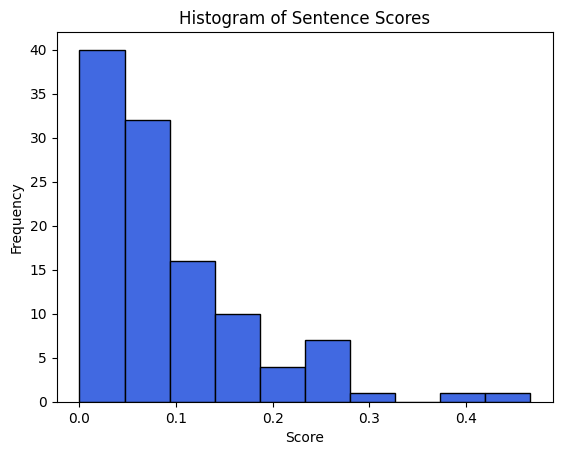

In [89]:
sentences = list(doc.sents) 

scores= []

for sentence in sentences:
    scores.append(score_sentence_by_token(sentence, interesting_tokens))
    
plt.hist(scores, color='royalblue', edgecolor='black')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Scores')

# display histogram
plt.show()

# Most common range of scores:
# A score range of 0-1.0 seems to have the vast majority of instances.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

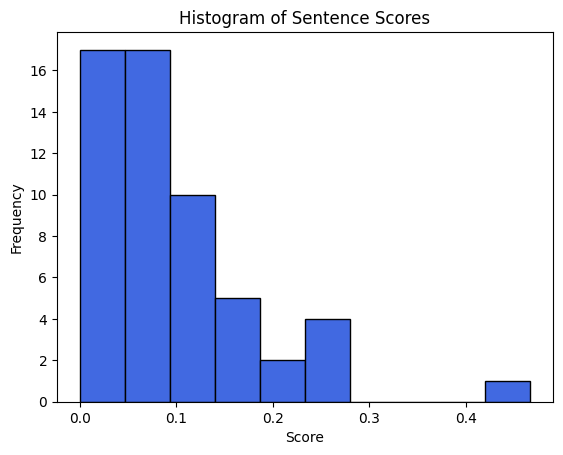

In [90]:
# empty scores list
scores = []

for sentence in sentences:
    scores.append(score_sentence_by_lemma(sentence, interesting_lemmas))
    
plt.hist(scores, color='royalblue', edgecolor='black')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Scores')

# display histogram
plt.show()

# Most common range of scores:
# A score range of 0-1.5 seems to have the vast majority of instances.  It like overall, the scores based on lemmas are lower than those based on tokens.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Presently, all of the tokens and lemmas in my top 5 lists are nouns, so no changes need to be made.  However, if we wanted to add a step that forces the top 5 lists to be nouns, we can use the 'pos_' attribute of a token.  This returns the part of speech the token is.  In questions 3 and 4 when I made filtered_tokens and filtered_lemmas, I had checks that removed white space and punctuation. We could add a condition that checks for "token.pos_ == 'NOUN'".

In [91]:
print(f"Top 5 Tokens: {top5_tokens}")
print(f"Top 5 Lemmas: {top5_lemmas}")

Top 5 Tokens: [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]
Top 5 Lemmas: [('laser', 40), ('headlight', 28), ('beam', 12), ('technology', 10), ('light', 10)]
